## Parte 4 - Clusterização - iFood

---
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">


### Definição do Problema

O departamento de Marketing quer entender o comportamento dos clientes do iFood, para isso fez uma solicitação para o time de Ciência de Dados para criar modelos de Machine Learning para segmentar os clientes.

### Carregando o conjunto de dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
#data_dir = '/content/df_orders.csv'
#df_orders = pd.read_csv(os.path.join(data_dir, 'df_orders.csv'))
df_orders = pd.read_csv(os.path.join('/content/drive/MyDrive/FIA Analytics/ML/2 - Introdução ao Machine Learning/IFOOD/df_orders.csv'))

In [4]:
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,...,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,...,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,...,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,...,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


In [5]:
df_orders.merchant_dish_type.value_counts() #

,count
merchant_dish_type,
Lanches,145585
Comida Brasileira,89551
Pizza,82781
Comida Japonesa,35804
Comida Saudável,19283
Açaí,16123
Comida Chinesa,12154
Comida Italiana,11530
Marmita,9285


In [6]:
df_orders.shape

(492138, 43)

# Segmentação por Tipo de Comida

**<span style="color:blue"></span> `Q1`** Crie a ABT de segmentação por tipo de comida utilizando as colunas `customer_id` e `merchant_dish_type` crie a ABT de Segmentação computando a frequência normalizada.

Salve o resultado na variável `abt_seg_tipo_comida`


In [7]:
abt_seg_tipo_comida = pd.crosstab(df_orders['customer_id'], df_orders['merchant_dish_type'], normalize='index').reset_index() #Explicação sobre o que é a opção de pd.crosstab https://docs.kanaries.net/pt/topics/Pandas/pandas-crosstab #
abt_seg_tipo_comida.head()

merchant_dish_type,customer_id,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,...,Pizza,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
abt_seg_tipo_comida.shape #tem 56 tipos de produtos que as pessoas pedem

(30079, 58)

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `abt_seg_tipo_comida` deverá conter exatamente `(30079, 57)`

**<span style="color:blue"></span> `Q2`** Utilizando a biblioteca `yellowbrick` crie o gráfico do cotovelo para visualizar quantos clusters devemos utilizar no KMeans.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 21)`

Utilize a variável `abt_seg_tipo_comida` para testar com k-clusters.


In [9]:
pip install yellowbrick

In [10]:
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
X = abt_seg_tipo_comida.drop("customer_id",axis=1).copy()
X.head()

merchant_dish_type,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,Comida Alemã,...,Pizza,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Criando o modelo KMeans
model = KMeans(random_state=15)

In [13]:
# Criando o visualizador do Cotovelo
visualizer = KElbowVisualizer(model, k=(2, 21))


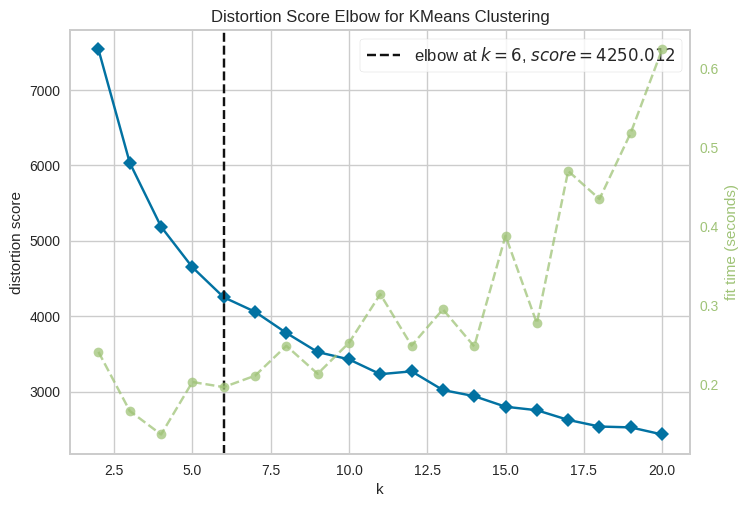

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Ajustando os dados
visualizer.fit(X)
visualizer.show()

**<span style="color:blue"></span> `Q3`** Qual é a quantidade de cluster sugerida pela biblioteca `yellowbriks`? Você concorda com esse valor para k?

Ele informa que deve ser de 6 clusters, isso irá depender do objetivo da empresa e a forma que ela deseja trabalhar em suas campanhas, além da disponibilidade de orçamento

**<span style="color:blue">[RESPOSTA]:</span>**

**<span style="color:blue"></span> `Q4`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=9`
* `random_state=15`

Após crei uma nova coluna no DF `abt_seg_tipo_comida` chamada `cluster_categorias` que deverá conter o número do cluster associado as características de cada linha.

In [15]:
kmeans = KMeans(n_clusters=9,random_state=15)
kmeans.fit(X)
kmeans.labels_
abt_seg_tipo_comida["cluster_categorias"] = kmeans.labels_

In [16]:
abt_seg_tipo_comida.head()

merchant_dish_type,customer_id,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,...,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba,cluster_categorias
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [17]:
abt_seg_tipo_comida["cluster_categorias"].value_counts()

,count
cluster_categorias,
8,6961
4,5707
6,4759
2,3939
1,3335
0,2306
3,1698
7,783
5,591


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

**<span style="color:blue"></span> `Q5`** Faça a avaliação do ajuste do KMeans utilizando o Mapa de Calor.

O que podemos concluir?


In [19]:
X.groupby(abt_seg_tipo_comida["cluster_categorias"]).mean().round(2)

merchant_dish_type,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,Comida Alemã,...,Pizza,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba
cluster_categorias,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.91,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.01,0.0,0.00,0.0,0.01,0.0,0.0,0.0,...,0.08,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.02,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.01,0.0,0.00,0.0,0.01,0.0,0.0,0.0,...,0.08,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.03,0.0,0.01,0.0,0.04,0.0,0.0,0.0,...,0.09,0.0,0.03,0.0,0.02,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.01,0.0,0.00,0.0,0.01,0.0,0.0,0.0,...,0.08,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.02,0.0,0.00,0.0,0.01,0.0,0.0,0.0,...,0.44,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.65,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.06,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.03,0.0,0.00,0.0,0.01,0.0,0.0,0.0,...,0.11,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0


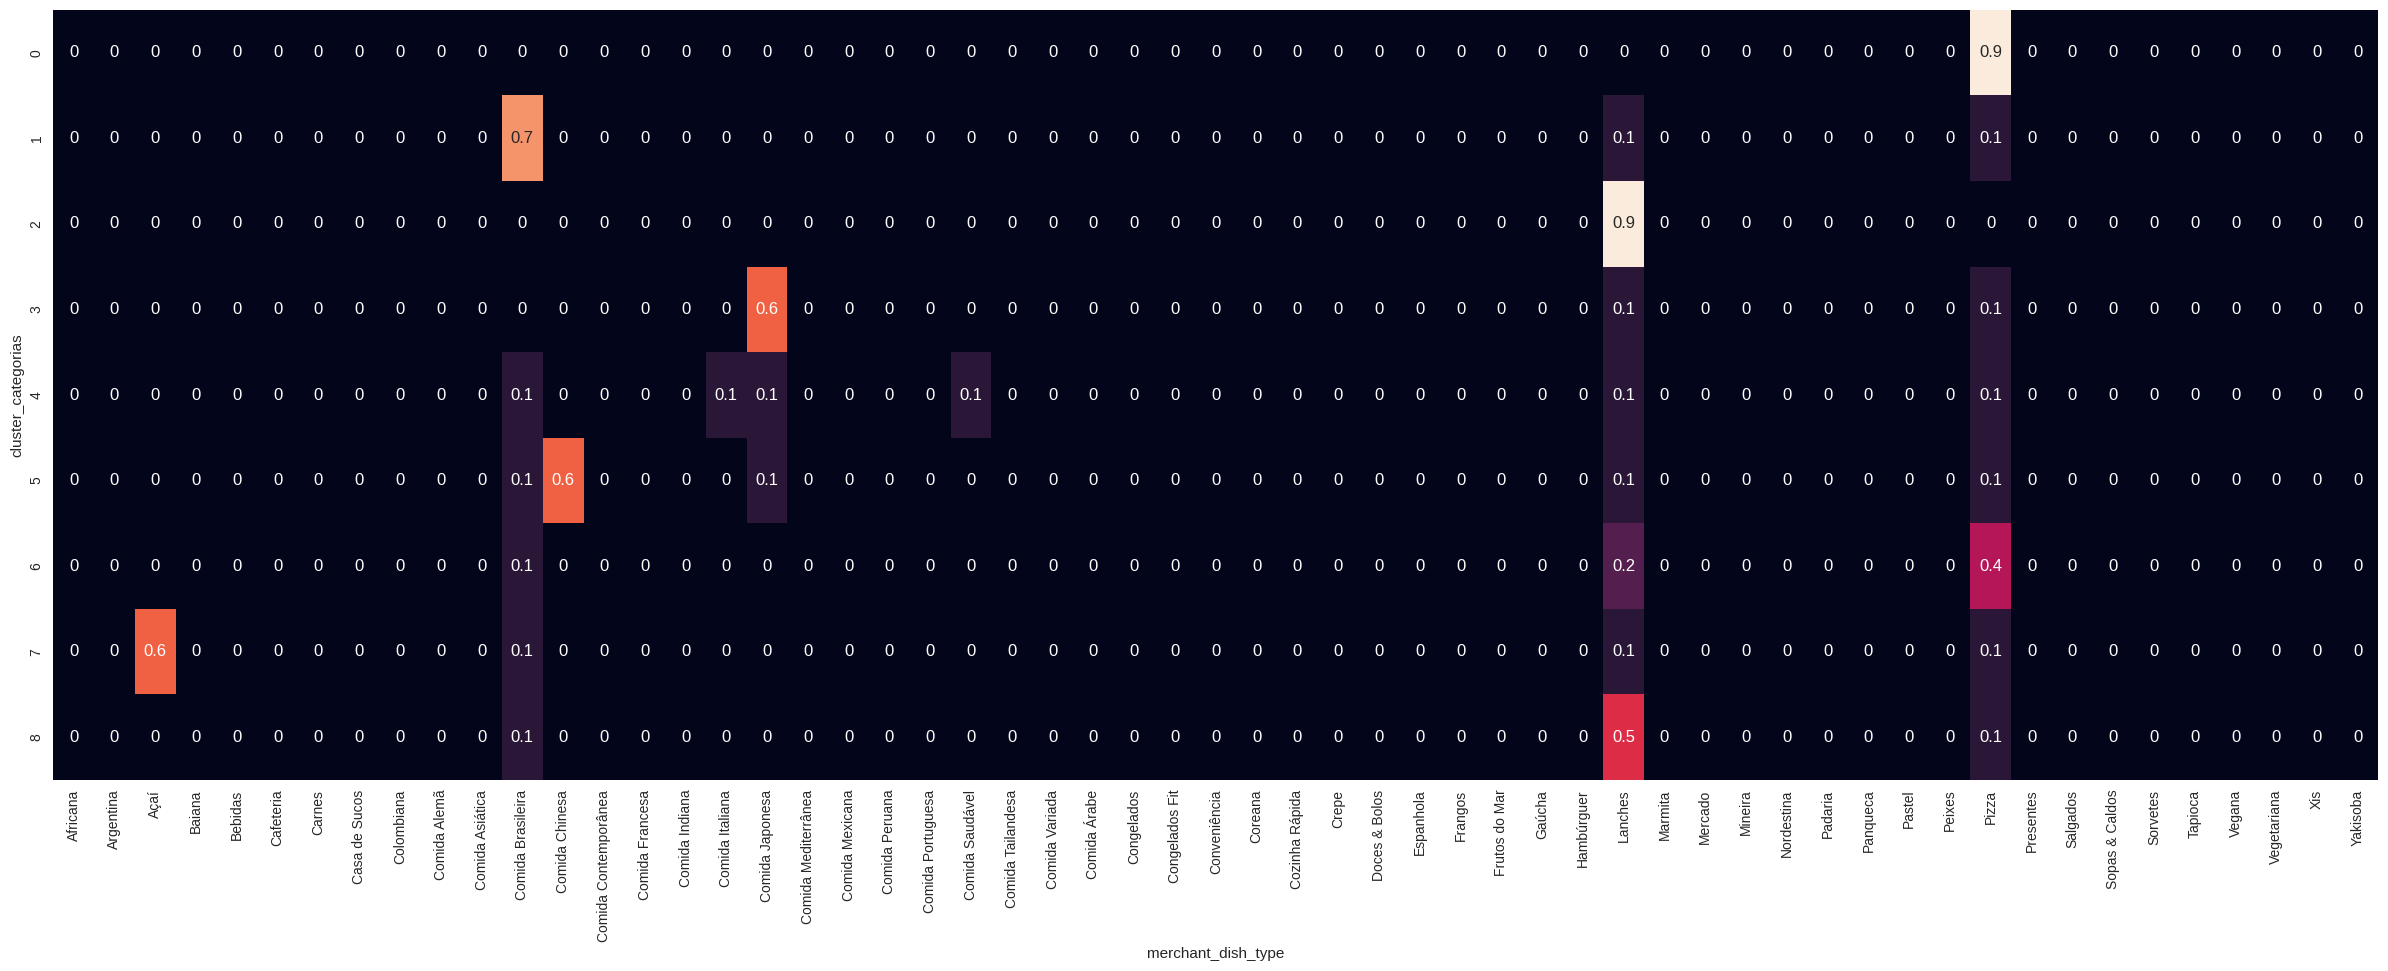

In [20]:
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(X.groupby(abt_seg_tipo_comida["cluster_categorias"]).mean().round(1),annot=True,cbar=False);

**<span style="color:blue">[RESPOSTA]:</span>**

**<span style="color:blue"></span> `Q6`** Utilize a técnica Surrougate Tree para selecionar as 9 variáveis mais importantes.

* Ajuste a Árvore de Decisão. Lembre-se de no fit remover a coluna `cluster_categorias` das features (colunas), uma vez que é isso que queremos identificar, sendo o nosso alvo.
* Recupere as 9 features mais importantes.
* Faça o mapa de calor para facilitar as conclusões sobre os grupos e quais variáveis impactam mais cada grupo gerado.
* Faça uma análise do resultado obtido no mapa de calor.

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
y = abt_seg_tipo_comida['cluster_categorias']
X = abt_seg_tipo_comida.drop(['cluster_categorias', 'customer_id'], axis=1)  # Assuming 'customer_id' is not a feature

# Now you can fit the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [23]:
pd.Series(clf.feature_importances_,index=X.columns.to_list()).sort_values(ascending=False).head(9)

,0
Lanches,0.365177
Pizza,0.285963
Comida Brasileira,0.141763
Comida Japonesa,0.096221
Açaí,0.050751
Comida Chinesa,0.039771
Comida Saudável,0.011206
Comida Italiana,0.001060
Marmita,0.001040


In [24]:
pd.Series(clf.feature_importances_,index=X.columns.to_list()).sort_values(ascending=False).head(9).index.to_list()

['Lanches',
 'Pizza',
 'Comida Brasileira',
 'Comida Japonesa',
 'Açaí',
 'Comida Chinesa',
 'Comida Saudável',
 'Comida Italiana',
 'Marmita']

In [25]:
top_features = pd.Series(clf.feature_importances_,index=X.columns.to_list()).sort_values(ascending=False).head(9).index.to_list()

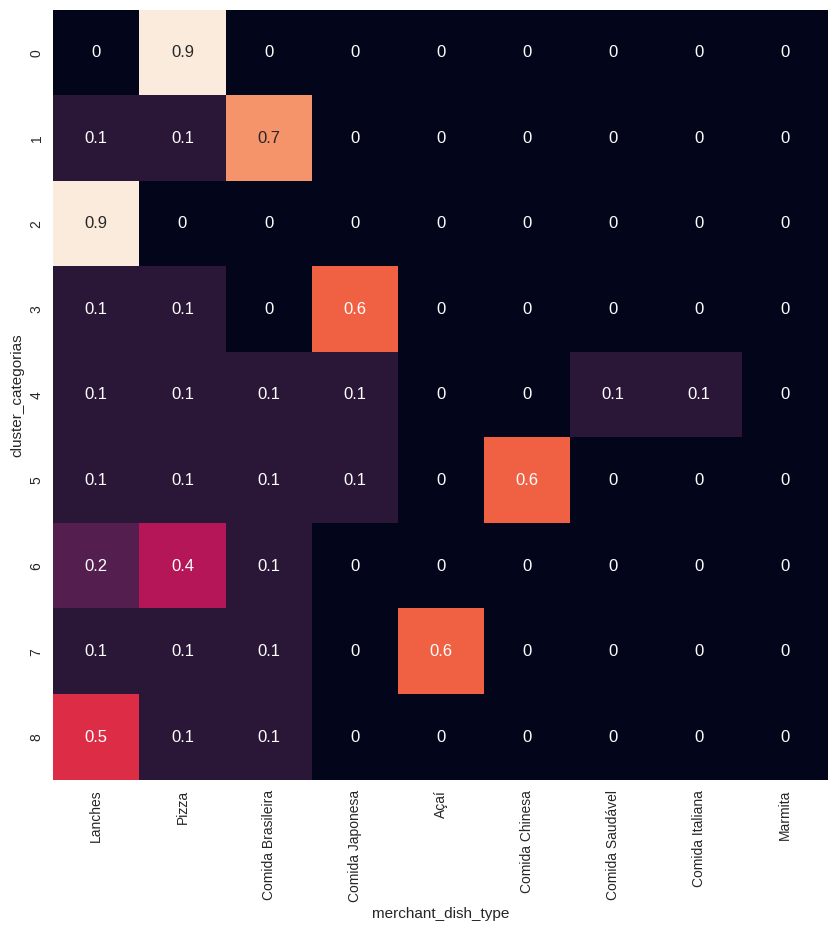

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.groupby(abt_seg_tipo_comida["cluster_categorias"])[top_features].mean().round(1),annot=True,cbar=False);

**<span style="color:blue">[RESPOSTA]:</span>**

# Segmentação por RFV

**<span style="color:blue"></span> `Q7`** Crie a ABT para a segmentação por RFV utilizando a base `df_orders` com as seguintes características:

* Faça o agrupamento pelo `customer_id`.
* Aplicar a função de agregação `count` para `order_id` e o resultado deve ser salvo em uma nova coluna com o nome de `total_pedidos`.
* Aplicar a função de agregação `sum` para `order_total` e o resultado deve ser salvo em uma nova coluna com o nome de `total_receita`.
* Reinicie o index da estrutura criada e salve na variável `abt_rfv`.



In [27]:
abt_rfv=(
    df_orders
    .groupby('customer_id') #representa a linha
    .agg(
        total_pedidos=('order_id', 'count'),
        total_receita=('order_total', 'sum')
    )
    .reset_index()
)
abt_rfv.head()

,customer_id,total_pedidos,total_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96


In [28]:
abt_rfv.shape

(30079, 3)

**<span style="color:blue"></span> `Q8`** Faça o ranqueamento (rank) das colunas `total_pedidos` e `total_receita` com a opção `pct=True` e adicione o resultado no mesmo DF `abt_rfv`, sendo o nome da duas novas colunas como `rank_pct_pedidos` e `rank_pct_receita` respectivamente.

In [29]:
abt_rfv['rank_pct_pedidos'] = abt_rfv['total_pedidos'].rank(pct=True) #pct=True já trás em percentual
abt_rfv['rank_pct_receita'] = abt_rfv['total_receita'].rank(pct=True)
abt_rfv.head()

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363426
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20,0.161990,0.168855
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96,0.228349,0.231723


In [30]:
abt_rfv.shape

(30079, 5)

**<span style="color:blue"></span> `Q9`** Utilizando a biblioteca `yellowbrick` crie o gráfica do cotovelo para visualizar quantos clusters devemos utilizar no KMeans na base `abt_rfv`.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 10)`

Utilize as features `rank_pct_pedidos` e `rank_pct_receita` do DF `abt_rfv` para testar com k-clusters.

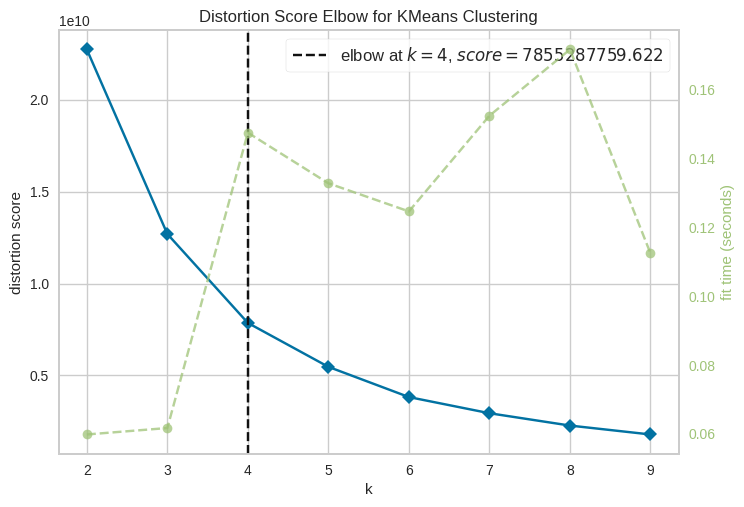

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
kmeans = KMeans(random_state=15)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(abt_rfv.drop("customer_id",axis=1))
visualizer.show()

**<span style="color:blue"></span> `Q10`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=4`
* `random_state=15`

Após crei uma nova coluna no DF `abt_rfv` chamada `cluster_fv` que deverá conter o número do cluster associado as características de cada linha.

In [32]:
kmeans = KMeans(n_clusters=4,random_state=15)
kmeans.fit(abt_rfv.drop("customer_id",axis=1))
kmeans.labels_
abt_rfv["cluster_fv"] = kmeans.labels_
abt_rfv.head()

,customer_id,total_pedidos,total_receita,rank_pct_pedidos,rank_pct_receita,cluster_fv
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,6,293.70,0.375096,0.363426,3
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,6,345.18,0.375096,0.403404,3
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,7,385.56,0.415090,0.430583,3
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,2,103.20,0.161990,0.168855,3
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,3,153.96,0.228349,0.231723,3


In [33]:
kmeans.fit(abt_rfv.drop("customer_id",axis=1))
kmeans.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

**<span style="color:blue"></span> `Q11`** Faça o plot do tipo `scatter` considerando os seguintes parâmetros:

`x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, pallete='deep'`

Utilize a biblioteca `seaborn`.


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

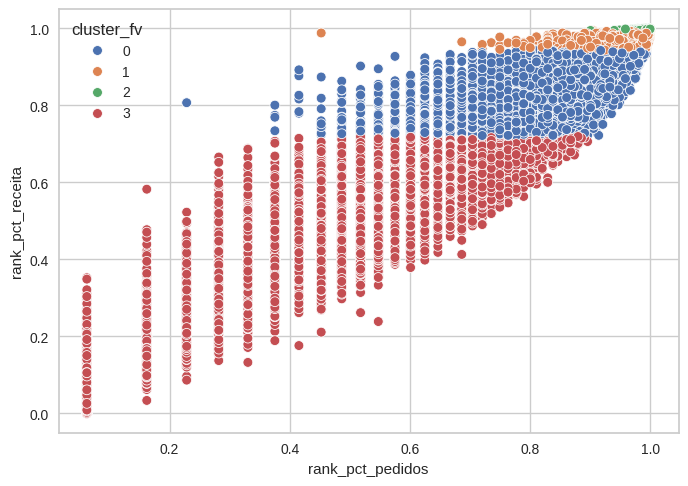

In [ ]:
sns.scatterplot(data=abt_rfv,x="rank_pct_pedidos",y ="rank_pct_receita",hue="cluster_fv",s=50,palette="deep");

**<span style="color:blue"></span> `Q12`** Faça um único plot dos dois gráficos criados anteriormente (mapa de calor e o plot do tipo `scatter`). Utilize as variáveis `abt_seg_tipo_comida` e `abt_rfv`.

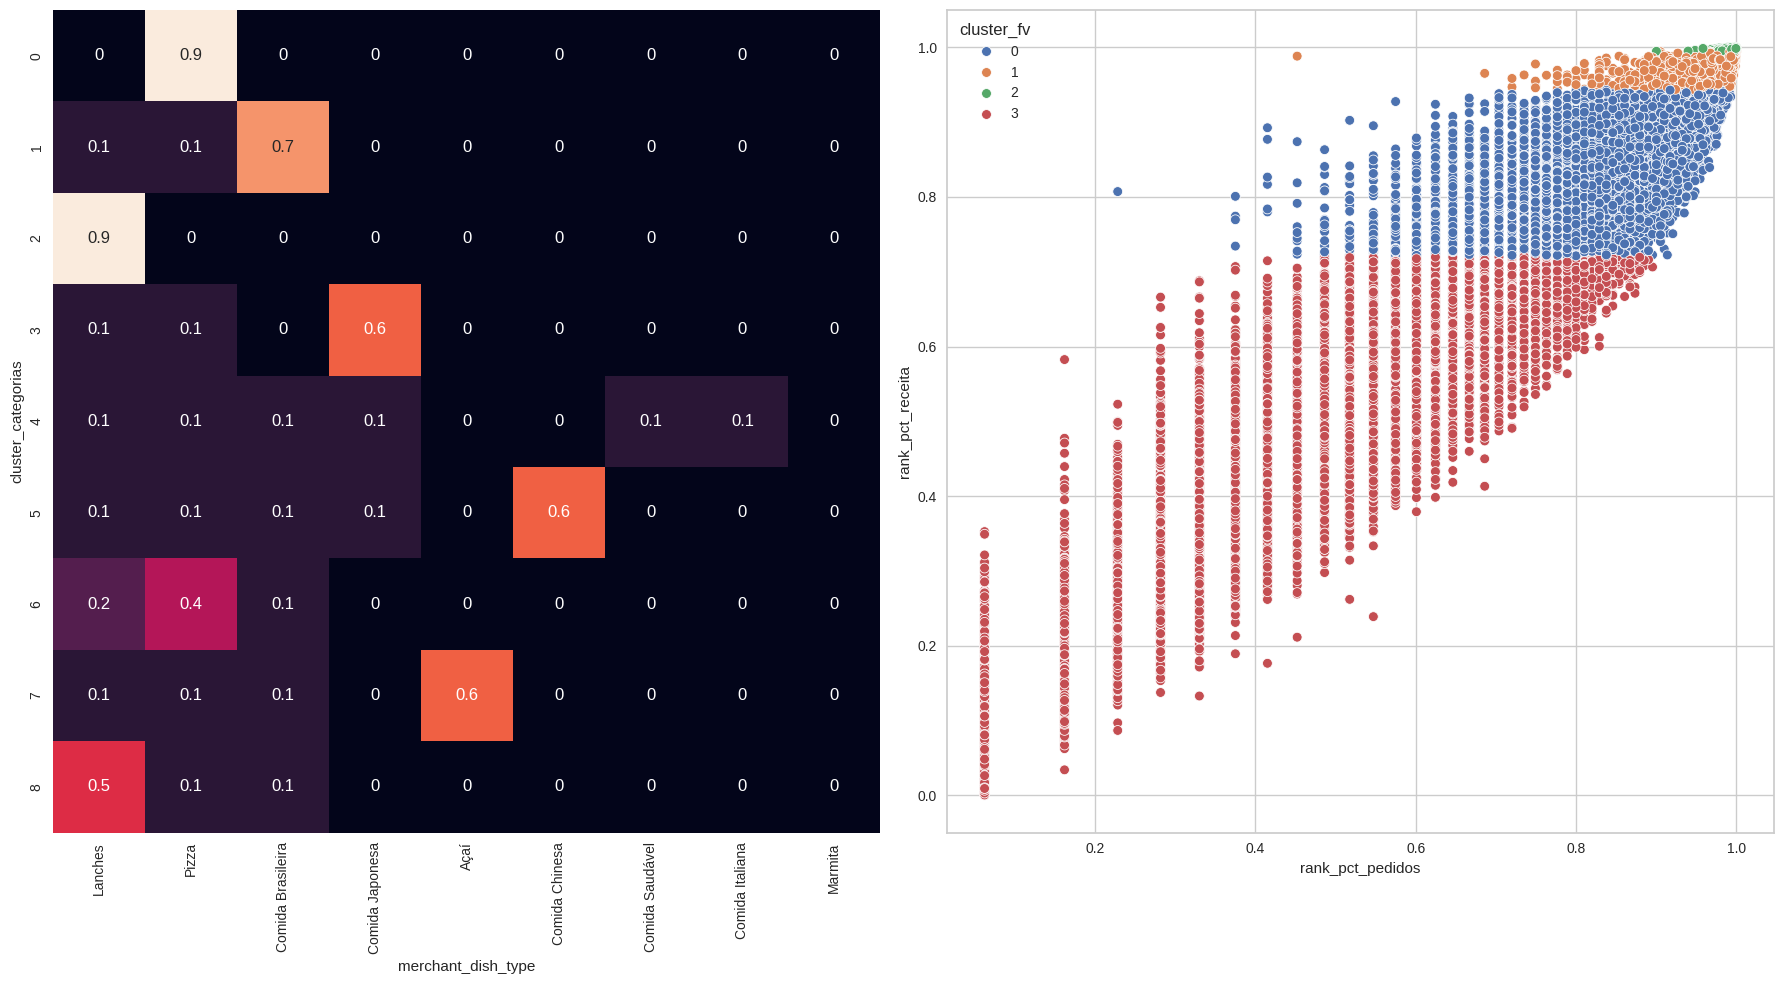

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando a figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Primeiro subplot - Heatmap
# Using abt_seg_tipo_comida instead of X for the heatmap
sns.heatmap(abt_seg_tipo_comida.groupby(abt_seg_tipo_comida["cluster_categorias"])[top_features].mean().round(1),
            annot=True,
            cbar=False,
            ax=ax1)

# Segundo subplot - Scatter plot
sns.scatterplot(data=abt_rfv,
                x="rank_pct_pedidos",
                y="rank_pct_receita",
                hue="cluster_fv",
                s=50,
                palette="deep",
                ax=ax2)

# Ajustando o layout
plt.tight_layout()
plt.show()

**<span style="color:blue"></span> `Q13`** Faça a junção da `abt_seg_tipo_comida` com a `abt_rfv`. Lembre-se de reiniciar o indices da `abt_seg_tipo_comida` e utilize o seguintes parâmetros na junção (`merge`):

* `on='customer_id'`
* `how='left'`

Por fim, filtre apenas as colunas: `'customer_id', 'cluster_categorias', 'cluster_fv'`.

Salve o resultado na variável `resultado_segmentacao`.

In [35]:
import pandas as pd
from typing import Optional

def merge_and_filter_segments(
    df_food_type: pd.DataFrame,
    df_rfv: pd.DataFrame
) -> pd.DataFrame:
    """
    Merges food type segmentation with RFV analysis and filters specific columns.

    Parameters:
    -----------
    df_food_type : pd.DataFrame
        DataFrame containing food type segmentation data
    df_rfv : pd.DataFrame
        DataFrame containing RFV (Recency, Frequency, Value) analysis

    Returns:
    --------
    pd.DataFrame
        Merged and filtered DataFrame containing only customer_id,
        cluster_categorias, and cluster_fv columns
    """
    # Reset index of food type segmentation DataFrame
    df_food_type_reset = df_food_type.reset_index()

    # Perform left merge
    merged_df = df_food_type_reset.merge(
        df_rfv,
        on='customer_id',
        how='left'
    )

    # Filter required columns
    result = merged_df[['customer_id', 'cluster_categorias', 'cluster_fv']]

    return result

# Example usage:
resultado_segmentacao = merge_and_filter_segments(abt_seg_tipo_comida, abt_rfv)

In [36]:
resultado_segmentacao.head()

,customer_id,cluster_categorias,cluster_fv
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0,3
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,1,3
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,8,3
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,6,3
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,8,3


In [37]:
resultado_segmentacao.shape

(30079, 3)

**<span style="color:blue"></span> `Q14`** Faça o agrupamento pelo `cluster_categorias` e `cluster_fv` para visualizar a quantidade de clientes que existem em cada categoria gerada em relação aos grupos de frequência e venda.

* Utilize a função de agregação `count`
* Utilize a função `unstack` para facilitar a visualização
* Salve na variável `resultado_analise`.

Por fim, crie uma nova coluna, chamada `total`, nesse DF com a soma total de clientes dentro de cada cada grupo do `cluster_categorias`.

In [51]:
# Realiza o agrupamento e conta quantos clientes há em cada combinação de cluster_categorias e cluster_fv
resultado_analise = resultado_segmentacao.groupby(['cluster_categorias', 'cluster_fv']).count().unstack() # Changed 'df' to 'resultado_segmentacao'

# Realiza o agrupamento e conta quantos clientes há em cada combinação de cluster_categorias e cluster_fv
resultado_analise = resultado_segmentacao.groupby(['cluster_categorias', 'cluster_fv']).count().unstack() # Changed 'df' to 'resultado_segmentacao'

# Cria a coluna 'total' com a soma dos clientes em cada grupo de cluster_categorias
resultado_analise['total'] = resultado_analise.sum(axis=1)

# Exibe o DataFrame resultante
print(resultado_analise)

cluster_fv             0    1   2     3  total
cluster_categorias                            
0                    177   12   1  2116   2306
1                    680  166  10  2479   3335
2                    330   23   0  3586   3939
3                    312   80   2  1304   1698
4                   1841  632  91  3143   5707
5                     67    7   0   517    591
6                   1309  191  18  3241   4759
7                     94    7   1   681    783
8                   1875  419  41  4626   6961


**<span style="color:blue"></span> `Q15`** Faça uma análise sobre os resultados obtidos nos exercícios Q12, Q13 e Q14.

Para facilitar, utilize a variável `resultado_segmentacao` para verificar a frequencia dos grupos gerados no `cluster_fv` dentro dos grupos do `cluster_categorias`.



```
`# This is formatted as code`
```

**<span style="color:blue">[RESPOSTA]:</span>**


A categoria 8 reúne o maior número de clientes, e dentro dela, o cluster_fv 3 se destaca como o mais representativo. Isso significa que a maioria dos clientes desse grupo apresenta alta frequência e um grande volume de compras.